# Analyze Supermarket Data Across the Country - Company XYZ

Company XYZ owns a supermarket chain across the country. Each major branch located in 3 cities across the country recorded sales information for 3 months, to help the company understand sales trends and determine its growth, as the rise of supermarkets competition is seen.

You will apply learnings to analyse the dataset in the data folder, and the description of each feature can be found in this [link](https://docs.google.com/document/d/1Sv-DlynHpOBAs5qKokn5MtbzqZcumTSlSI4-wQ0kf0w/edit?usp=sharing)

## Step 1 - Loading the Dataset
In this step, you will combine the dataset from each branch (3 branches) into one dataset for easy analysis. You expected to write the syntaxes that will read multiple files from your current working directory and export a CSV file after combining. 
The learning from this step is the ability to automate reading and combining multiple CSV files, because as a Data Professional, you will saddled with the responsibility of reading data from different sources, and this is one of the use case.

#### To-Do - Import Libraries

In [51]:
import os
import glob
import pandas as pd
os.getcwd()

os.chdir("C:\\Users\\pc\\Desktop\\USTACKY PANDAS ANALYSIS") #Current working directory that contains your dataset and code file

#### To-Do - Use glob to match the pattern "csv"

In [11]:
extension = 'csv'
print(glob.glob('*branch.csv'))

['abuja_branch.csv', 'lagos_branch.csv', 'portharcourt_branch.csv']


#### To-Do - Combine all the files in the generated list above and export to a CSV
Tips - Use the `pd.concat` method

In [196]:
abuja= pd.read_csv('abuja_branch.csv')
lagos = pd.read_csv('lagos_branch.csv')
port_harcourt = pd.read_csv('portharcourt_branch.csv')
pd.concat([lagos ,abuja, port_harcourt]).to_csv("all_branches.csv")

#### To-Do -Read the CSV file using `pd.read_csv` method

In [197]:
all_branches = pd.read_csv('all_branches.csv')
all_branches = all_branches.iloc[: , 1:]

## Step 2 - Data Exploration
In this step you will explore the loaded dataset using some built-in Pandas function. You expected to begin to think about your analytical approach from here. 
You can include other methods that you might think will make your exploration process easier. For Instance, you can write a function that print out a summary of the missing data occurence in the data. Be sure to document these methods using `markdown` and in-line `comments`.

### Import Libraries

In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

#### To-Do - Use the head() method to view first few rows of the dataset

In [199]:
all_branches.head()

,Unnamed: 0.1,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,0,750-67-8428,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,1/5/2019,13:08,Epay,188218.8,4.761905,9410.94,9.1
1,1,631-41-3108,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,122589.18,3/3/2019,13:23,Card,116751.6,4.761905,5837.58,7.4
2,2,123-19-1176,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,176057.28,1/27/2019,20:33,Epay,167673.6,4.761905,8383.68,8.4
3,3,373-73-7910,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,228376.26,2/8/2019,10:37,Epay,217501.2,4.761905,10875.06,5.3
4,4,355-53-5943,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,156129.12,2/25/2019,14:36,Epay,148694.4,4.761905,7434.72,5.8


#### To-Do - Check the number of rows and columns present in the data using the shape attribute.

In [200]:
all_branches.shape

(1000, 18)

#### To-Do - Generate the names of the columns using the columns attribute.

In [368]:
for col in all_branches.columns:
    print(col)

Unnamed: 0.1
Invoice ID
Branch
City
Customer type
Gender
Product line
Unit price
Quantity
Tax 5%
Total
Date
Time
Payment
cogs
gross margin percentage
gross income
Rating
Day
Month
Year
Hour


#### To-Do - Statiscal Summary
The describe method provides the data statistical summary for the dataset, use the method to explore the statistical summary.

In [202]:
all_branches.describe()

,Unnamed: 0.1,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,166.204000,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,96.337673,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.131498e-14,4215.177173,1.71858
min,0.000000,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,83.000000,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,166.000000,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,249.250000,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,339.000000,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


#### To-Do - Below this cell write in few sentences what you can derive from the data statistical summary

The total count of all transactions inthe three branches is 1000.
Average unit price is 20,041.96 , lowest unit price is 3628.80 median unit price is 19882.80 , the highest unit price is 35,985.
The average gross income across all branches is 5536.57, minimum and maximum gross income across all branches are 183.06 and 17874.00 respectively



#### To-Do - Missing values
The `isnull`, and `notna` methods can provide a quick overview of the missing data occurence, use that to observe the presence of missing data in the dataset. You can add the sum method to get a summary and not boolean values.

In [369]:
all_branches.isnull().sum()

Unnamed: 0.1               0
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Day                        0
Month                      0
Year                       0
Hour                       0
dtype: int64

In [370]:
all_branches.notna().sum()

Unnamed: 0.1               1000
Invoice ID                 1000
Branch                     1000
City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
Date                       1000
Time                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
Day                        1000
Month                      1000
Year                       1000
Hour                       1000
dtype: int64

#### To-Do - Data Information
The `info()` function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. Use this method to observe the data type of each feature.

In [371]:
all_branches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0.1             1000 non-null   int64         
 1   Invoice ID               1000 non-null   object        
 2   Branch                   1000 non-null   object        
 3   City                     1000 non-null   object        
 4   Customer type            1000 non-null   object        
 5   Gender                   1000 non-null   object        
 6   Product line             1000 non-null   object        
 7   Unit price               1000 non-null   float64       
 8   Quantity                 1000 non-null   int64         
 9   Tax 5%                   1000 non-null   float64       
 10  Total                    1000 non-null   float64       
 11  Date                     1000 non-null   datetime64[ns]
 12  Time                     1000 non-n

## Step 3 - Dealing with DateTime Features

From the summary above, you can observe that the `date` and `time` columns are not in the appropriate data type
you can convert to `datetime` datatype using the `to_datetime()` method. After that is done, use the type attribute 
to confirm the datatype. 

#### To-Do - Use `to_datetime()` to convert the `date` column to `datetime`

In [372]:
import datetime as dt

In [373]:
all_branches['Date'] = pd.to_datetime(all_branches['Date'])

#### To-Do - Check the datatype to confirm if it's in `datetime`

In [375]:
all_branches['Date'].head()

0   2019-01-05
1   2019-03-03
2   2019-01-27
3   2019-02-08
4   2019-02-25
Name: Date, dtype: datetime64[ns]

#### To-Do - Repeat the two steps above to the `time` column

In [209]:
all_branches['Time'] = pd.to_datetime(all_branches['Time'])

In [210]:
all_branches['Time'].head()

0   2022-03-26 13:08:00
1   2022-03-26 13:23:00
2   2022-03-26 20:33:00
3   2022-03-26 10:37:00
4   2022-03-26 14:36:00
Name: Time, dtype: datetime64[ns]

## Extract Features from date & time

#### To-Do - Extract the Day feature from the `Date` column, and save to a new `Day` column

In [211]:
all_branches['Day'] = all_branches['Date'].dt.day

#### To-Do - Extract the Month feature from the `Date` column, and save to a new `Month` column

In [212]:
all_branches['Month'] = all_branches['Date'].dt.month

#### To-Do -Extract the Year feature from the `Date` column, and save to a new `Year` column  

In [213]:
all_branches['Year'] = all_branches['Date'].dt.year

#### To-Do - Extract the `Hour` feature from the `Time` column and save to a new `Hour` column

In [214]:
all_branches['Hour'] = all_branches['Time'].dt.hour

#### Pandas provide the `nunique()` method to get a count of unique values, while the `unique()` function is used to get unique values of Series object.

#### To-Do -  From the hours information, determine the numbers of unique hours of sales in the supermarket, and return an array of the hours using the unique() method

In [215]:
all_branches.loc[: , 'Hour'].nunique()

11

In [216]:
all_branches.loc[: , 'Hour'].unique()

array([13, 20, 10, 14, 17, 16, 19, 11, 18, 12, 15], dtype=int64)

## Step 4 - Unique Values in Columns

With the line of code below, we can get a list of the categorical column in the dataset. We iterate through the columns and check if each element is an object datatype. The result is saved to the "categorical_columns" variable
as a list.

In [217]:
categorical_columns = [col for col in all_branches.columns if all_branches[col].dtype == "object" ]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

#### To-Do- From the information above, generate the unique values in the categorical columns (apart from the example - Branch column).
For example, the unique values of the "Branch" column is displayed in list, as shown below.
<br/>
`df['Branch'].unique().tolist()
['B', 'C', 'A']`
</br>
<br/>
You can add print formating syntax to print out the total numbers of these values in a particular column. 

In [218]:
print(all_branches['Branch'].unique().tolist())

['A', 'B', 'C']


In [219]:
print("Total Number of unique values in the Branch Column : {}". format(len(all_branches['Branch'].unique().tolist())))

Total Number of unique values in the Branch Column : 3


In [377]:
print(all_branches['Invoice ID'].unique().tolist())

['750-67-8428', '631-41-3108', '123-19-1176', '373-73-7910', '355-53-5943', '665-32-9167', '365-64-0515', '252-56-2699', '829-34-3910', '656-95-9349', '765-26-6951', '329-62-1586', '636-48-8204', '549-59-1358', '227-03-5010', '189-17-4241', '848-62-7243', '595-11-5460', '129-29-8530', '272-65-1806', '162-48-8011', '106-35-6779', '635-40-6220', '817-48-8732', '199-75-8169', '877-22-3308', '232-11-3025', '382-03-4532', '287-21-9091', '381-20-0914', '633-44-8566', '504-35-8843', '873-51-0671', '594-34-4444', '865-92-6136', '212-62-1842', '704-48-3927', '630-74-5166', '645-44-1170', '642-32-2990', '638-60-7125', '668-90-8900', '870-54-3162', '802-70-5316', '700-81-1757', '354-39-5160', '575-30-8091', '239-10-7476', '685-64-1609', '238-49-0436', '746-94-0204', '782-95-9291', '275-28-0149', '101-17-6199', '687-47-8271', '796-32-9050', '105-31-1824', '249-42-3782', '827-26-2100', '175-54-2529', '407-63-8975', '851-28-6367', '586-25-0848', '400-60-7251', '831-07-6050', '856-22-8149', '749-24-1

In [221]:
print("Total Number of unique values in the Invoice ID Column : {}". format(len(all_branches['Invoice ID'].unique().tolist())))

Total Number of unique values in the Invoice ID Column : 1000


In [222]:
print(all_branches['City'].unique().tolist())

['Lagos', 'Abuja', 'Port Harcourt']


In [223]:
print("Total Number of unique values in the City Column : {}". format(len(all_branches['City'].unique().tolist())))

Total Number of unique values in the City Column : 3


In [224]:
print(all_branches['Customer type'].unique().tolist())

['Member', 'Normal']


In [225]:
print("Total Number of unique values in the Customer type Column : {}". format(len(all_branches['Customer type'].unique().tolist())))

Total Number of unique values in the Customer type Column : 2


In [226]:
print(all_branches['Gender'].unique().tolist())

['Female', 'Male']


In [227]:
print("Total Number of unique values in the Gender Column : {}". format(len(all_branches['Gender'].unique().tolist())))

Total Number of unique values in the Gender Column : 2


In [228]:
print(all_branches['Product line'].unique().tolist())

['Health and beauty', 'Home and lifestyle', 'Sports and travel', 'Electronic accessories', 'Food and beverages', 'Fashion accessories']


In [229]:
print("Total Number of unique values in the Product line Column : {}". format(len(all_branches['Product line'].unique().tolist())))

Total Number of unique values in the Product line Column : 6


In [230]:
print(all_branches['Payment'].unique().tolist())

['Epay', 'Card', 'Cash']


In [231]:
print("Total Number of unique values in the Payment Column : {}". format(len(all_branches['Payment'].unique().tolist())))

Total Number of unique values in the Payment Column : 3


#### To-Do: The `value_counts()` function is used to get a Series containing counts of unique values. For the categorical columns above, generate the count figure of the values using the `value_counts() ` method.


In [232]:
all_branches['City'].value_counts()

Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64

In [233]:
all_branches['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [234]:
all_branches['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [235]:
all_branches['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [236]:
all_branches['Payment'].value_counts()

Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64

## Step 5 - Aggregration with GroupBy

#### To-Do - Your task here, will be to create a groupby object with the "City Column", and aggregation function of sum and mean. 

In [238]:
all_branches.groupby('City')

#### To-Do - Using the groupby object, display a table that shows the gross income of each city, and determine the city with the highest total gross income.

In [239]:
all_branches.groupby('City').agg({'gross income': ['count' ,'sum' , 'mean']})

gross income                         
                     count         sum         mean
City                                               
Abuja                  332  1820531.52  5483.528675
Lagos                  340  1820577.78  5354.640529
Port Harcourt          328  1895463.54  5778.852256

From the above table, the city with the highest total gross income is Port Harcourt

In [240]:
all_branches.groupby('City').agg({'Unit price': ['count' ,'sum' , 'mean']})

Unit price                         
                   count        sum          mean
City                                             
Abuja                332  6652396.8  20037.339759
Lagos                340  6705176.4  19721.107059
Port Harcourt        328  6684393.6  20379.248780

In [241]:
all_branches.groupby('City').agg({'Quantity': ['count' ,'sum' , 'mean']})

Quantity                
                 count   sum      mean
City                                  
Abuja              332  1820  5.481928
Lagos              340  1859  5.467647
Port Harcourt      328  1831  5.582317

## Step 6 - Data Visualization

In this section, you will provide answer to some questions by generating charts and making use of different plotting styles. You will use the `Seaborn visualization` library to generate your plots. For all visualizations, include a chart title by using the seaborn `set_title` method

#### To-Do- Using `countplot`, determine the branch with the highest sales record. Optional - You can extend this to determine - most used payment method, city with the most sales

In [242]:
all_branches.head()

,Unnamed: 0.1,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
0,0,750-67-8428,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,...,2022-03-26 13:08:00,Epay,188218.8,4.761905,9410.94,9.1,5,1,2019,13
1,1,631-41-3108,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,...,2022-03-26 13:23:00,Card,116751.6,4.761905,5837.58,7.4,3,3,2019,13
2,2,123-19-1176,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,...,2022-03-26 20:33:00,Epay,167673.6,4.761905,8383.68,8.4,27,1,2019,20
3,3,373-73-7910,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,...,2022-03-26 10:37:00,Epay,217501.2,4.761905,10875.06,5.3,8,2,2019,10
4,4,355-53-5943,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,...,2022-03-26 14:36:00,Epay,148694.4,4.761905,7434.72,5.8,25,2,2019,14


Text(0.5, 1.0, 'COUNT OF SALES PER BRANCH')

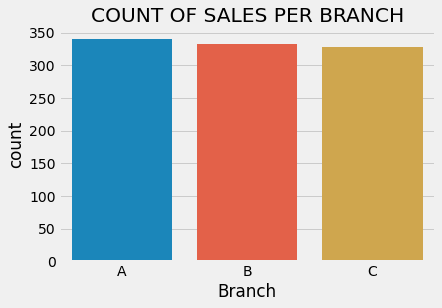

In [247]:
sns.countplot(x= 'Branch',data = all_branches ).set_title('COUNT OF SALES PER BRANCH')

#### Explore a countplot for the `Payment` and `City` Column

Text(0.5, 1.0, 'PAYMENT TYPE ACROSS ALL BRANCHES')

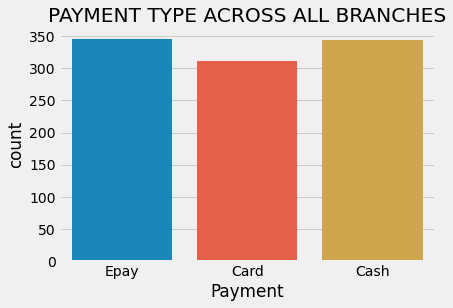

In [249]:
sns.countplot(x= 'Payment' , data = all_branches ).set_title('PAYMENT TYPE ACROSS ALL BRANCHES')

Text(0.5, 1.0, 'COUNT OF BRANCHES IN EACH CITY')

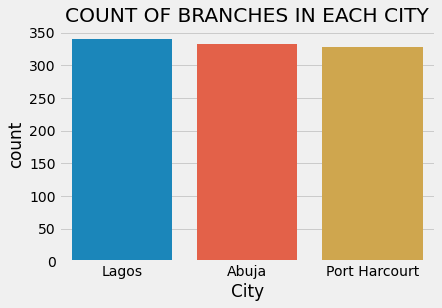

In [251]:
sns.countplot(x= 'City' , data = all_branches ).set_title('COUNT OF BRANCHES IN EACH CITY')

#### To-Do - Determine the highest & lowest sold product line, using Countplot 
Count Plot Tips- Set the `Product line` column to y-axis to prevent congestion on the x-axis

Text(0.5, 1.0, 'COUNT PER PRODUCT LINE')

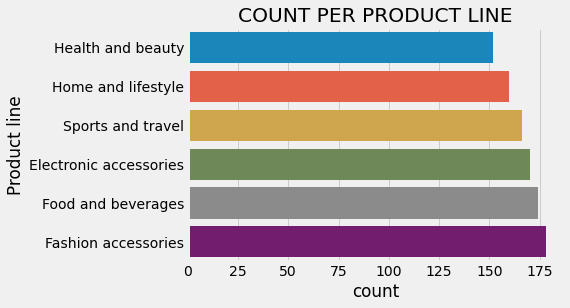

In [266]:
sns.countplot(y= 'Product line' , data = all_branches ).set_title('COUNT PER PRODUCT LINE')

#### To-Do -  Determine the Payment channel used by most customer to pay for each product line. Count Plot Tips- Set the "product line" column to y-axis to prevent congestion on the x-axis, and use the "hue" parameter for the "Payment" column. 

Text(0.5, 1.0, 'PAYMENT TYPE USED BY EACH CUSTOMER PERPRODUCT LINE')

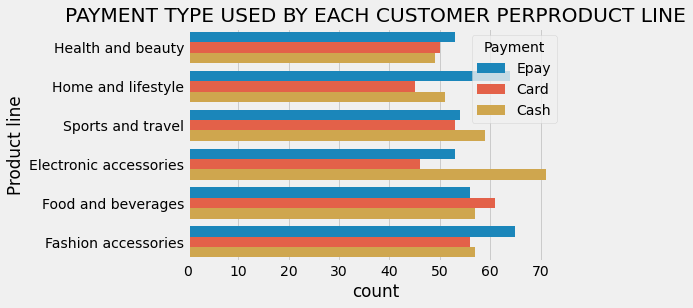

In [265]:
sns.countplot(y= 'Product line' , hue='Payment' , data = all_branches ).set_title('PAYMENT TYPE USED BY EACH CUSTOMER PERPRODUCT LINE')

#### To-Do- Determine the Payment channel for each branch.
Count Plot Tips - Use the hue parameter for the "branch" column

Text(0.5, 1.0, 'PAYMENT CHANNEL USED BY EACH BRANCH PRODUCT LINE')

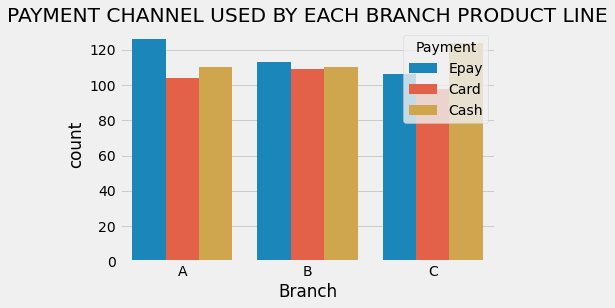

In [269]:
sns.countplot(x= 'Branch' , hue='Payment' , data = all_branches ).set_title('PAYMENT CHANNEL USED BY EACH BRANCH PRODUCT LINE')

#### To-Do- Determine the branch with the lowest rating. This you can determine using abox plot which gives a statistical summary of the plotted features, and you can pick out the branch with the lowest rating from the plot

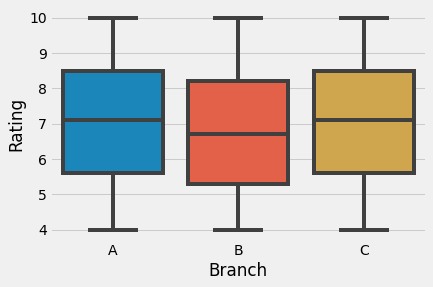

In [310]:
ratings = sns.boxplot(x = 'Branch' , y='Rating' , data =all_branches)

The branch with the lowest rating is Branch B

#### To-Do - The gender type often affects the kind of products being purchased at the supermarket. 
* Using a catplot() generate visualization for the "product line" on x-axis, quantity on the y-axis, and hue as gender. 
<br/>

#### Set the aspect parameter to 4, so can you can effectively space out each product line. 



* Plot the same chart, but `Total Column` as the y-axis

* Write a summary of the insights you can pick from this chart.

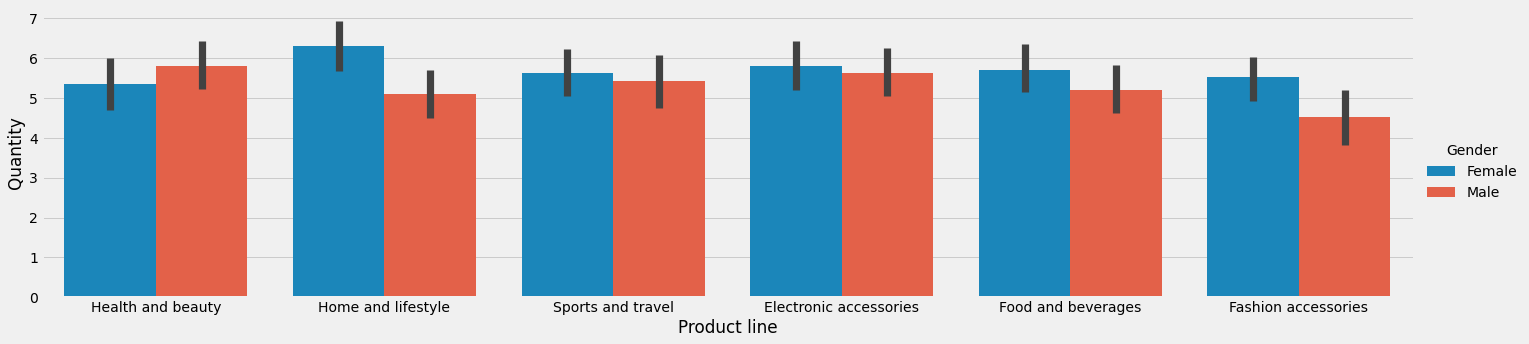

In [362]:
sns.catplot(x='Product line',
            y='Quantity',
            data= all_branches,
            kind='bar',
            hue = 'Gender' ,
            aspect=4);

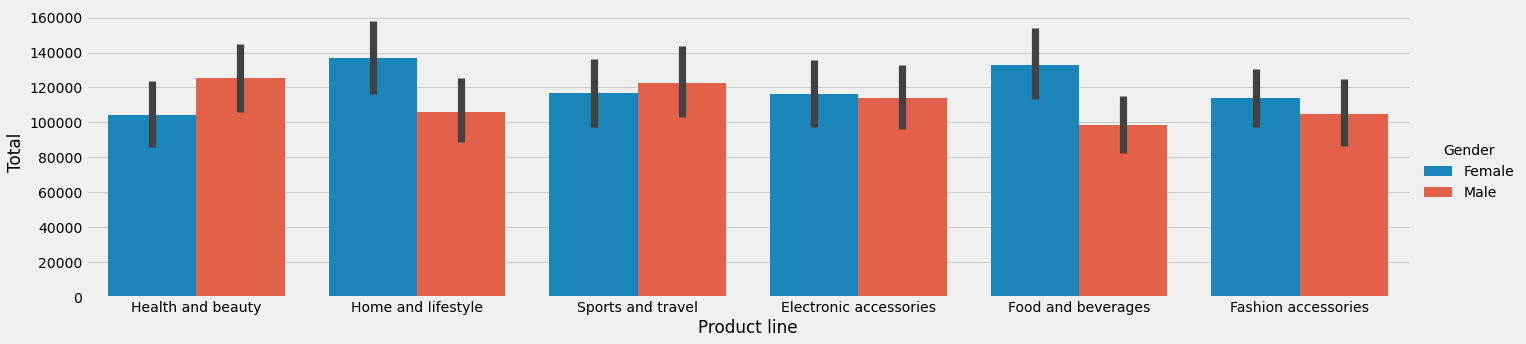

In [363]:
sns.catplot(x='Product line',
            y='Total',
            data= all_branches,
            kind='bar',
            hue = 'Gender' ,
            aspect=4);

insights: The female gender surpass the male gender in terms of quantity across all product line except in Health and beauty, with very visible difference in 'home and lifestyle', 'food and beverages' and fashion acessories.

likewise , in terms of total , the female folks have a Total greater than the male in all product line except in 'Health and safety'


#### To-Do -  An interesting insight to explore is the interaction of Unit price on the Quantity of goods purchased. To achieve this: 
* Use the `catplot()` to plot `Product line per unit price`, and `Product line per Quantity`. Set the kind parameter to `point` 
* In a new cell, Write a summary of the insights you uncovered

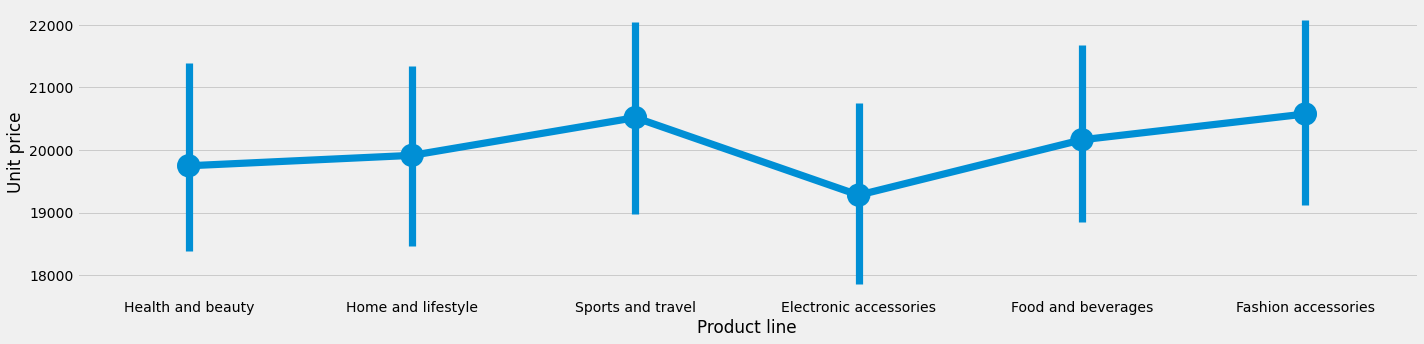

In [378]:
sns.catplot(x='Product line',
            y='Unit price',
            data= all_branches,
            kind='point',
            aspect=4);

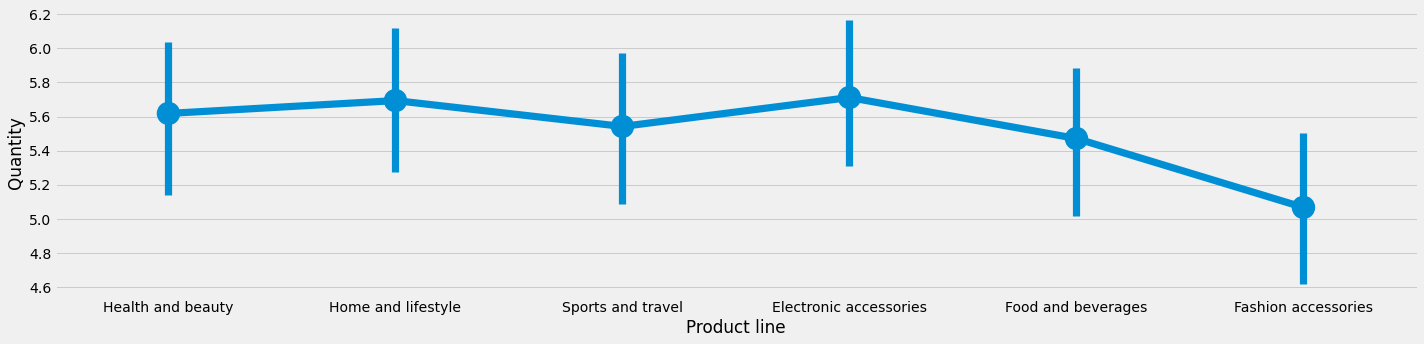

In [379]:
sns.catplot(x='Product line',
            y='Quantity',
            data= all_branches,
            kind='point',
            aspect=4);

#Write insights here

## Step 7 - StandOut Section
To make your submission standout, 
* You can continue to explore more insights that can be uncovered with different plotting methods.
* Write a detailed summary on your approach, methods and insights. 
* Visit the [link](https://seaborn.pydata.org/tutorial/categorical.html) for more Seaborn visualization plots.


In [395]:
all_branches.head()

,Unnamed: 0.1,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
0,0,750-67-8428,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,...,2022-03-26 13:08:00,Epay,188218.8,4.761905,9410.94,9.1,5,1,2019,13
1,1,631-41-3108,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,...,2022-03-26 13:23:00,Card,116751.6,4.761905,5837.58,7.4,3,3,2019,13
2,2,123-19-1176,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,...,2022-03-26 20:33:00,Epay,167673.6,4.761905,8383.68,8.4,27,1,2019,20
3,3,373-73-7910,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,...,2022-03-26 10:37:00,Epay,217501.2,4.761905,10875.06,5.3,8,2,2019,10
4,4,355-53-5943,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,...,2022-03-26 14:36:00,Epay,148694.4,4.761905,7434.72,5.8,25,2,2019,14


# Pie charts to show percentage contributions

### Pie chart showing percentage quantity of each branch

<AxesSubplot:ylabel='Quantity'>

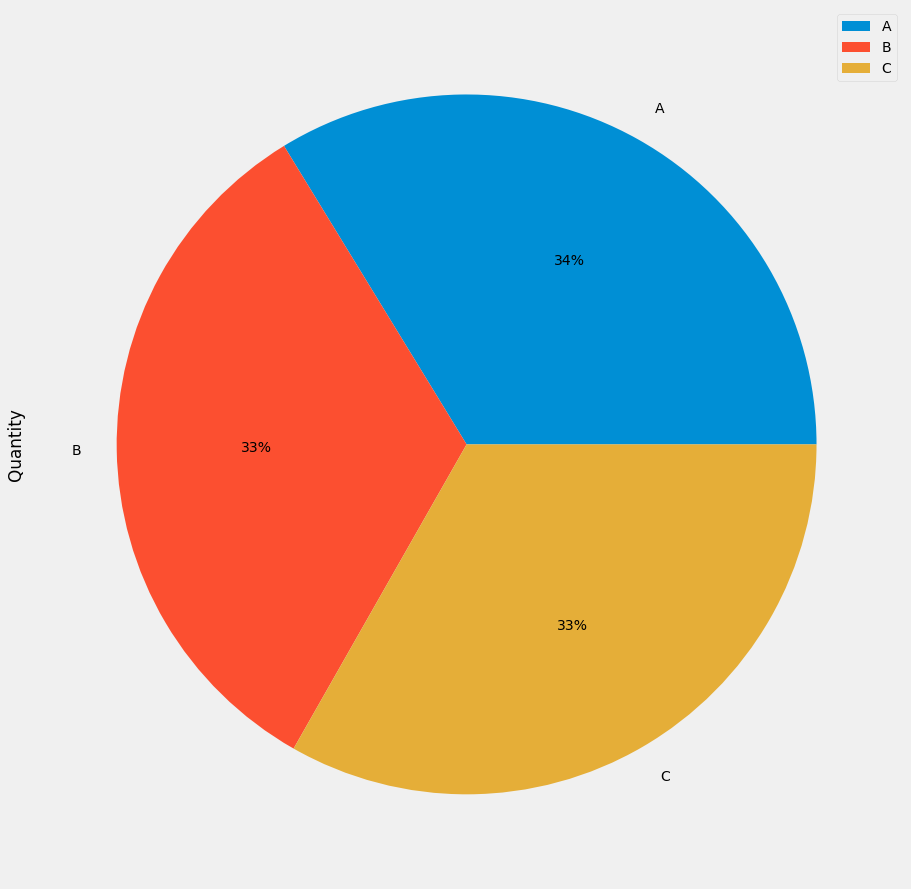

In [383]:
all_branches.groupby('Branch').sum().plot(
    kind = 'pie' ,y = 'Quantity' ,autopct='%1.0f%%' , figsize =(15 , 15))

### Pie chart showing the type of customers

<AxesSubplot:ylabel='Quantity'>

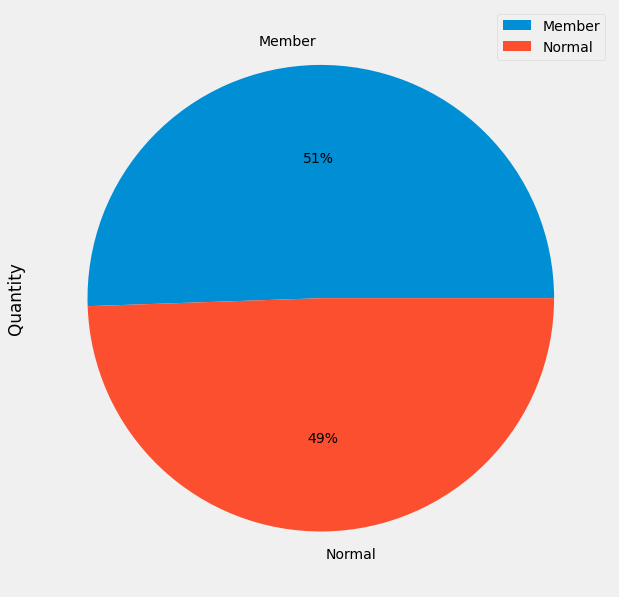

In [405]:
all_branches.groupby('Customer type').sum().plot(
    kind = 'pie' ,y = 'Quantity' ,autopct='%1.0f%%' , figsize =(10 , 10))

### Piechart showing the percentage gross income per branch

<AxesSubplot:ylabel='gross income'>

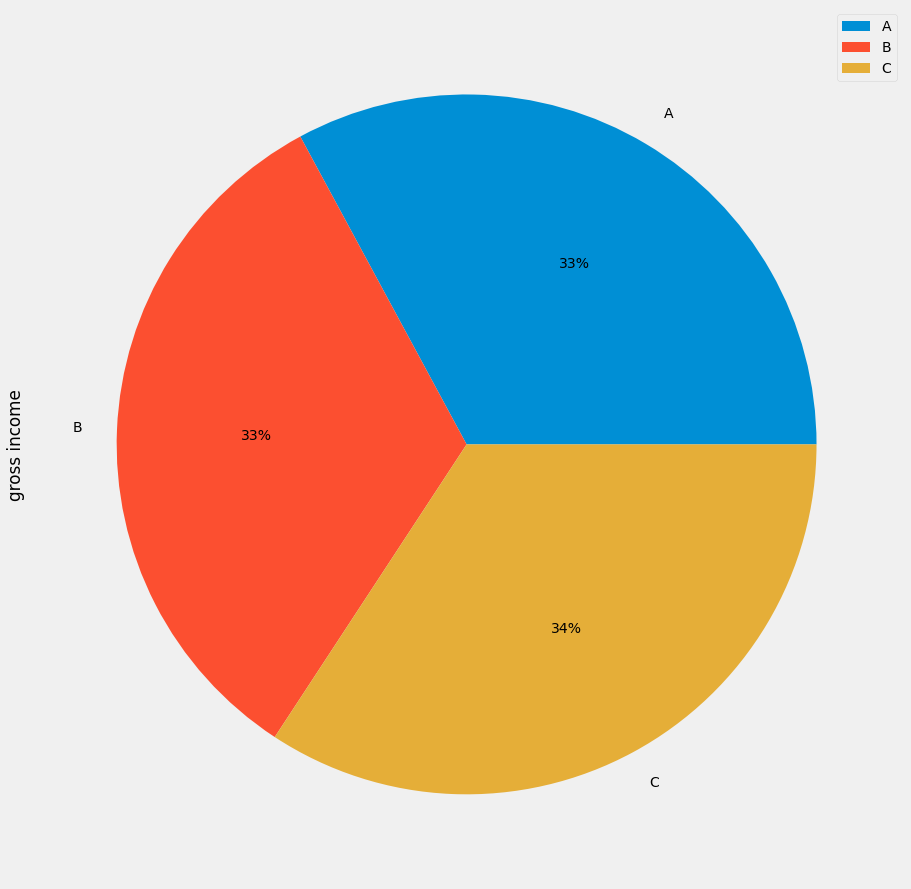

In [385]:
all_branches.groupby('Branch').sum().plot(
    kind = 'pie' ,y = 'gross income' ,autopct='%1.0f%%' , figsize =(15 , 15))

### Pie chart showing the percentage of branch ratings to overall ratings

<AxesSubplot:ylabel='Rating'>

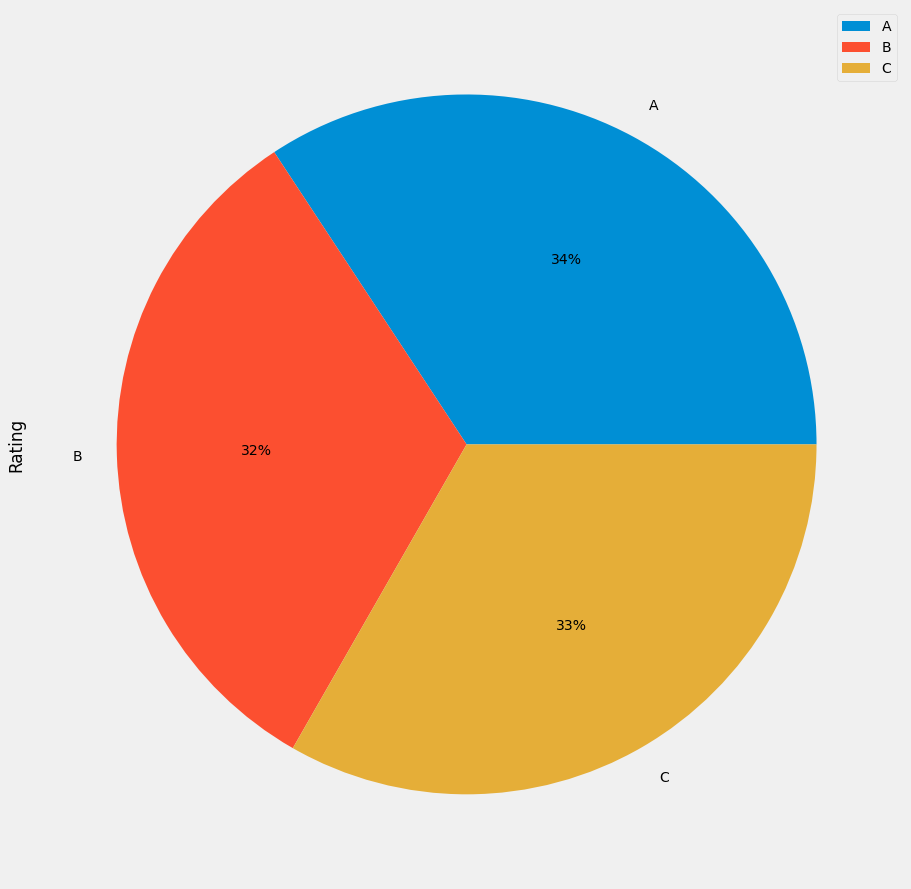

In [388]:
all_branches.groupby('Branch').sum().plot(
    kind = 'pie' ,y = 'Rating' ,autopct='%1.0f%%' , figsize =(15 , 15))

### Pie chart showing the quantity sold per month:
### Month 1 is January , Month 2 is February and Month 3 is March

<AxesSubplot:ylabel='Quantity'>

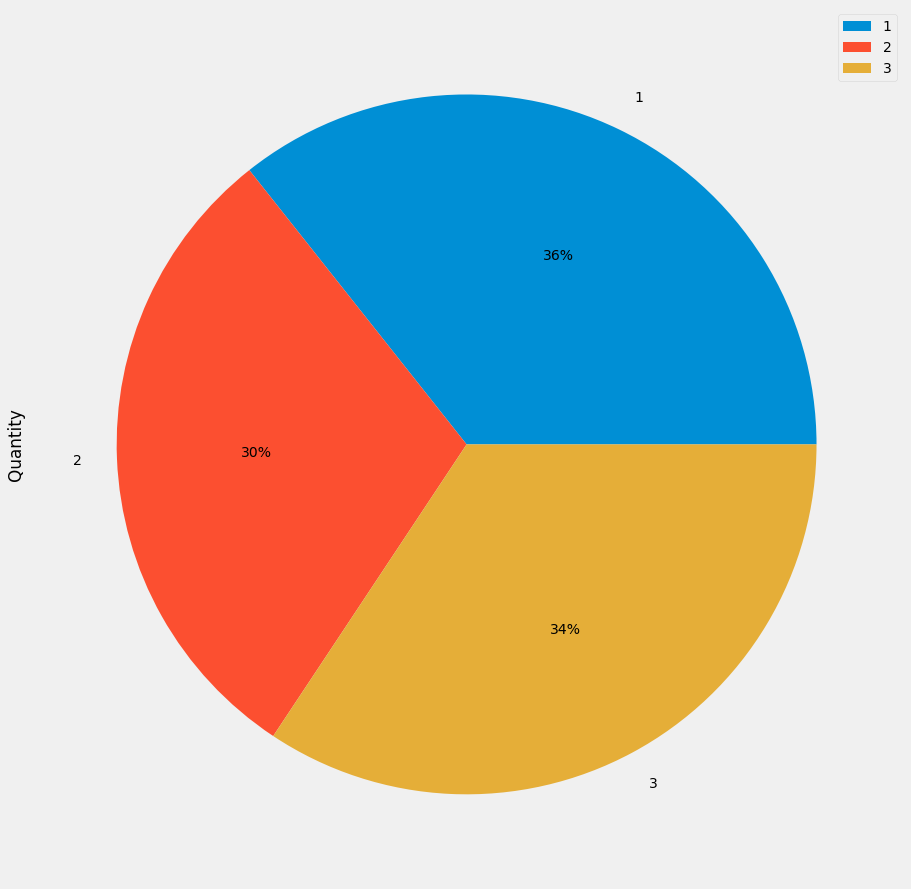

In [396]:
all_branches.groupby('Month').sum().plot(
    kind = 'pie' ,y = 'Quantity' ,autopct='%1.0f%%' , figsize =(15 , 15))

### Pie chart showing the quantity of goods bought at certain hours
The highest number of goods were sold at 7:00 pm while the least number of goods were sold at 8:00 PM

<AxesSubplot:ylabel='Quantity'>

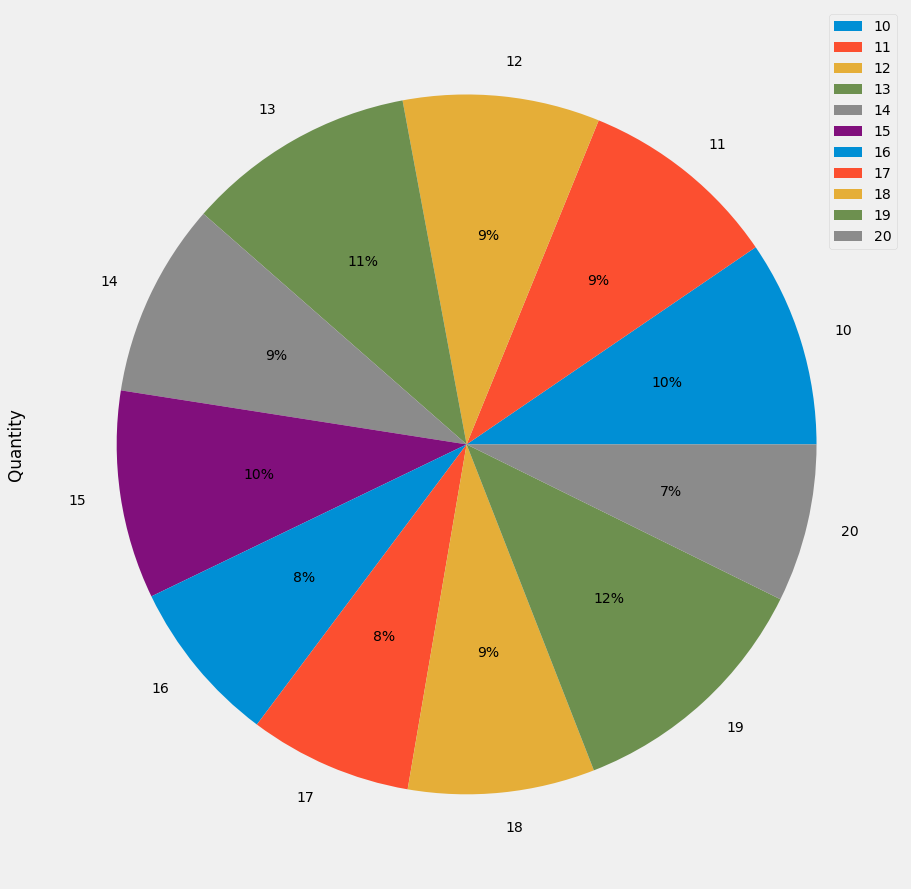

In [397]:
all_branches.groupby('Hour').sum().plot(
    kind = 'pie' ,y = 'Quantity' ,autopct='%1.0f%%' , figsize =(15 , 15))

### Pie chart showing the 

<AxesSubplot:ylabel='gross income'>

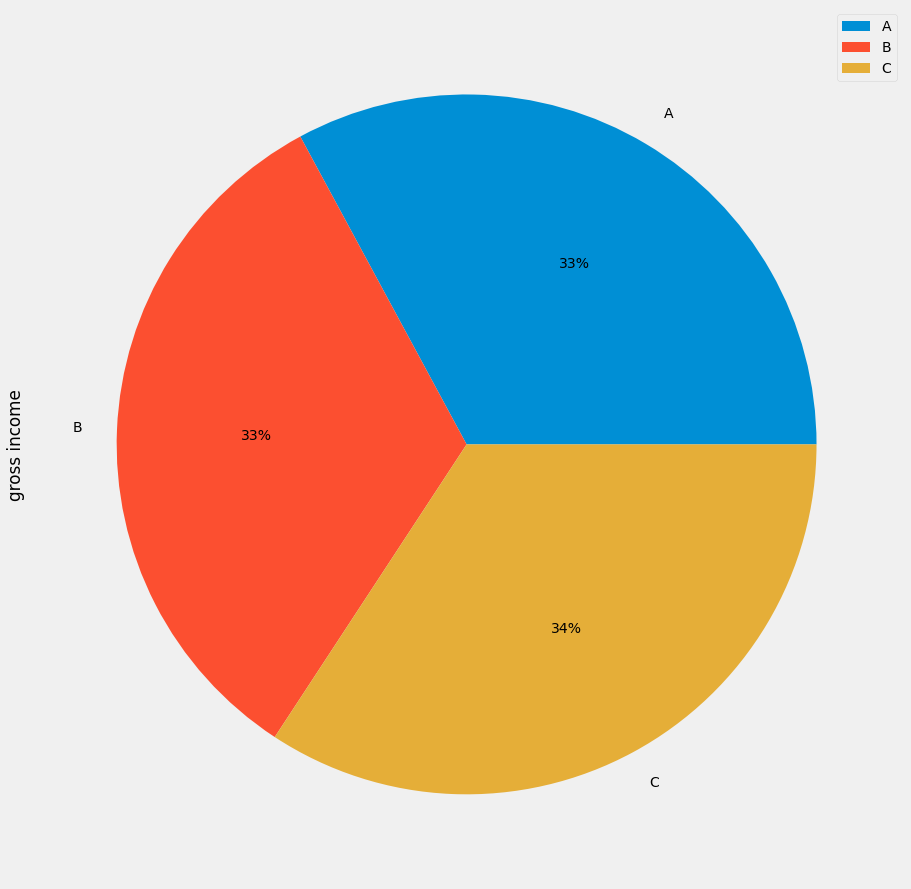

In [404]:
all_branches.groupby('Branch').sum().plot(
    kind = 'pie' ,y = 'gross income' ,autopct='%1.0f%%' , figsize =(15 , 15))

## Step 8 - Documentation.

* Write a detailed `ReadMe` that describes the project, explains important approach you followed to solve the tasks. Find a template in the starter file that can get you started quickly. Note: Do limit yourself to the template, you can include any interesting step that is worth sharing. 
* Write an Executive summary that you can present to `Company XYZ` management. The summary will explain your processes and insights you uncovered that can help the company 

### Summary

In [ ]:
based on the data , Lagos has the highest number of branches with 340 branches , Abuja has 332 while Port Harcourt has 328 branches.
The total number of members captured in the data are 501 , while 499 non members were represented.
As Lagos had the highest number of branches , it also had the highest number of sales but according to the unit price, 
Port Harcourt has the Highest average unit price while Lagos has the average lowest unit price. 
With the above , Port Harcourt has the highest total gross income of 1895463.54 , Abuja has a total gross Income of 1820531.32 
while , Lagos has the least gross income of 1800577.78.

Of all product Line , Fashion accessories is the highest sold across all branches while health and beauty 
is the lowest sold of the product line across all branches.
Considering the method of payment, Epay is averagely the mostly used payment across all branches, most customers who 
purchased elctronic acessories pay with cash , while most customers who purchased food and beverages pay with card.

The branch with the lowest rating is branch B.
Across gender and product line , more males purchased health and beauty products than females , while the females
purchased the goods in all other product line, such as home and lifestyle , sport and travel , electronic accessories , food and 
beverages , fashion acessories , than the male.